The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

* "state", string. 2-letter code of the US state of customer residence

* "account_length", numerical. Number of months the customer has been with the current telco provider

* "area_code", string="area_code_AAA" where AAA = 3 digit area code.

* "international_plan", (yes/no). The customer has international plan.

* "voice_mail_plan", (yes/no). The customer has voice mail plan.

* "number_vmail_messages", numerical. Number of voice-mail messages.

* "total_day_minutes", numerical. Total minutes of day calls.

* "total_day_calls", numerical. Total minutes of day calls.

* "total_day_charge", numerical. Total charge of day calls.

- "total_eve_minutes"-, numerical. Total minutes of evening calls.

- "total_eve_calls"-, numerical. Total number of evening calls.

- "total_eve_charge"-, numerical. Total charge of evening calls.

- "total_night_minutes"-, numerical. Total minutes of night calls.

- "total_night_calls"-, numerical. Total number of night calls.

- "total_night_charge"-, numerical. Total charge of night calls.

- "total_intl_minutes"-, numerical. Total minutes of international calls.

- "total_intl_calls"- numerical. Total number of international calls.

- "total_intl_charge"-, numerical. Total charge of international calls

- "number_customer_service_calls"-, numerical. Number of calls to customer service

- "churn"-, (yes/no). Customer churn - target variable.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("churn_train.csv")
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [7]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
data.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


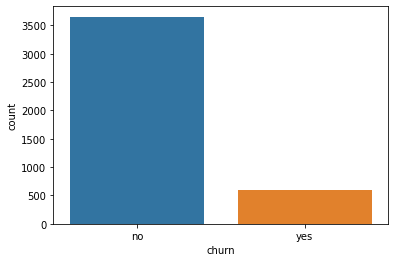

In [9]:
sns.countplot(data['churn'])

In [10]:
check=pd.DataFrame(data['churn'].value_counts())
total=sum(check['churn'])
p1=round((check['churn'][0]*100)/total,2)
p2=round((check['churn'][1]*100)/total,2)
p=[p1,p2]
check['percentage']=p
check

,churn,percentage
no,3652,85.93
yes,598,14.07


From the above dataframe, we can clearly see that the data is imbalanced. we will make it balance in the upcomming steps

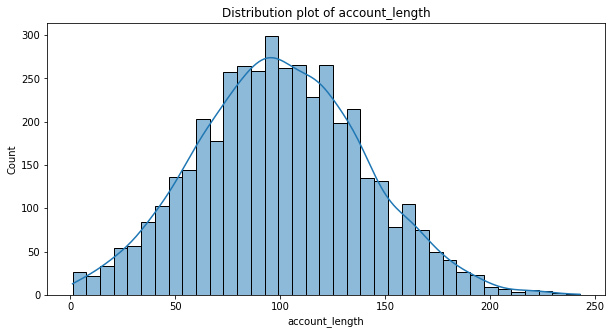

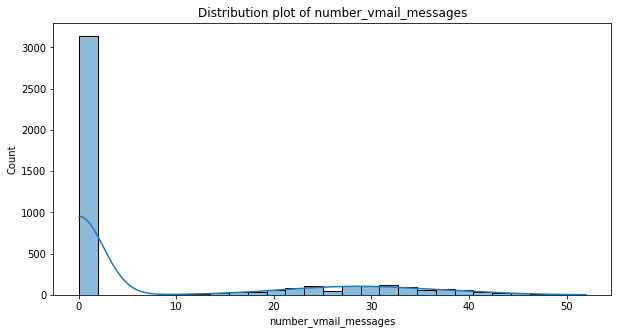

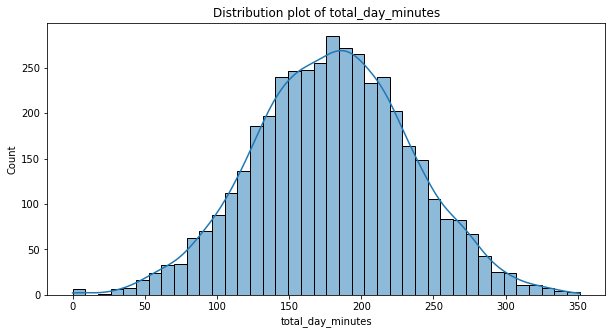

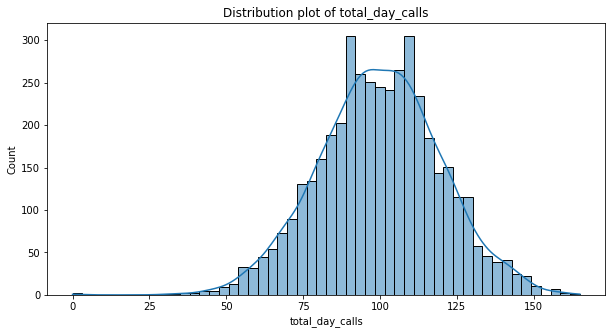

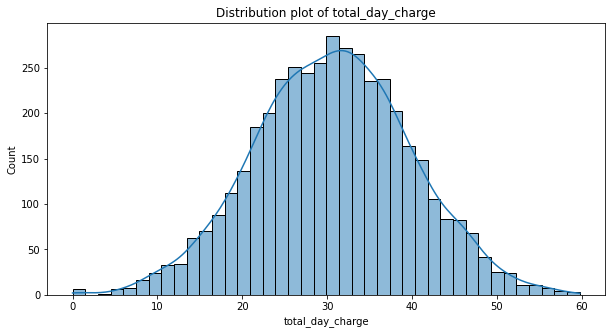

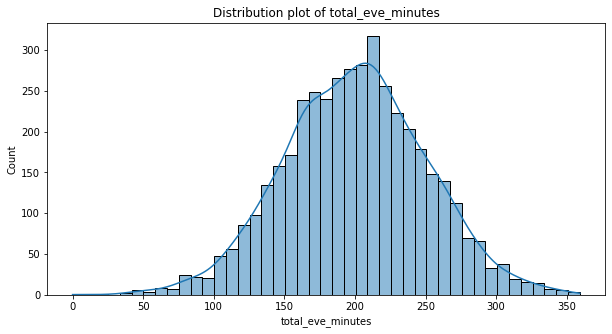

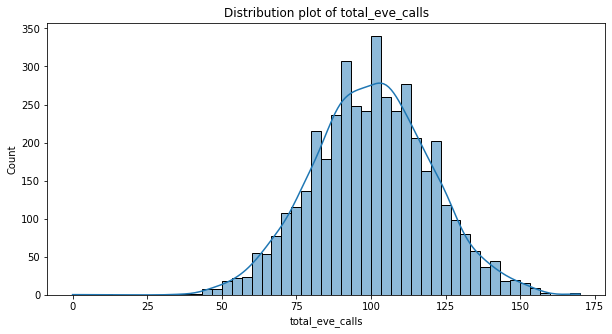

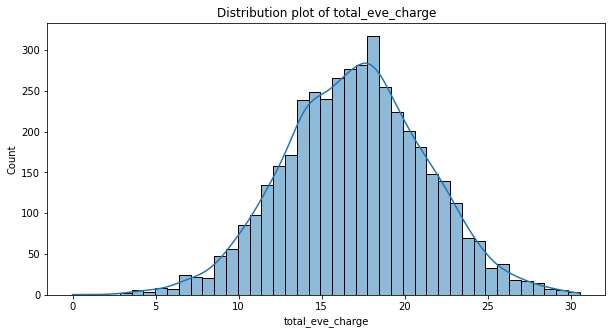

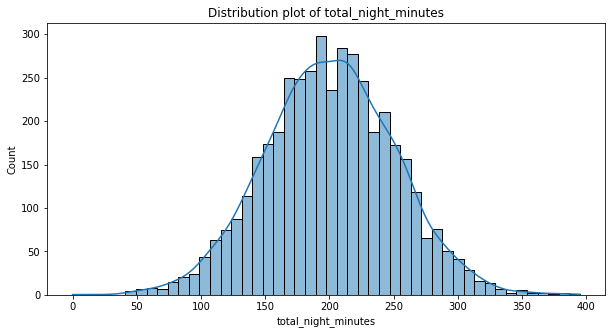

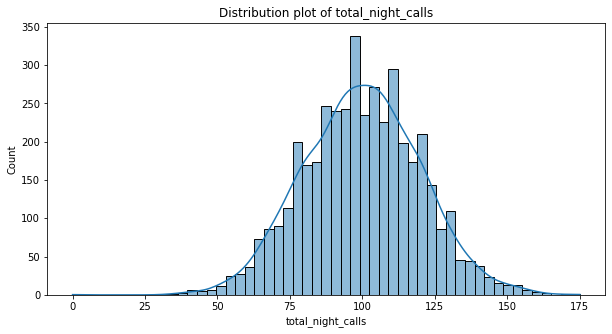

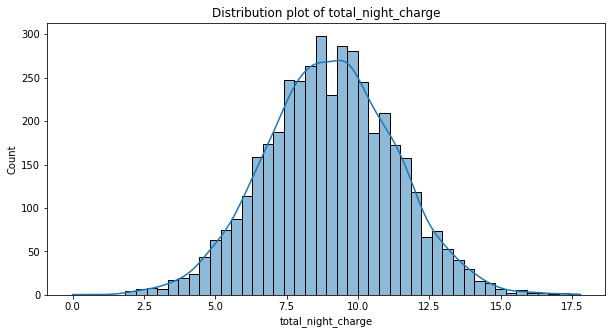

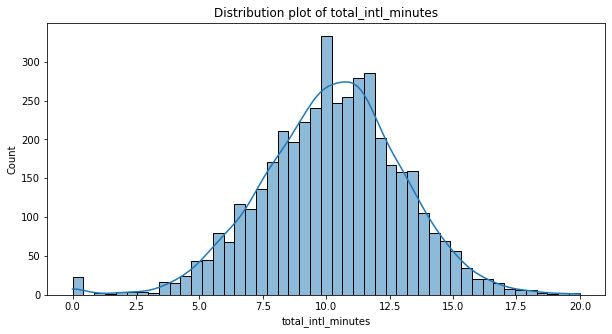

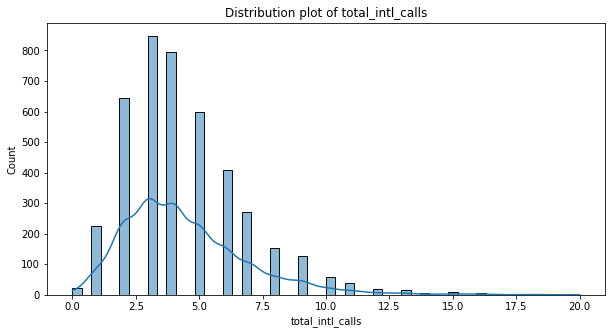

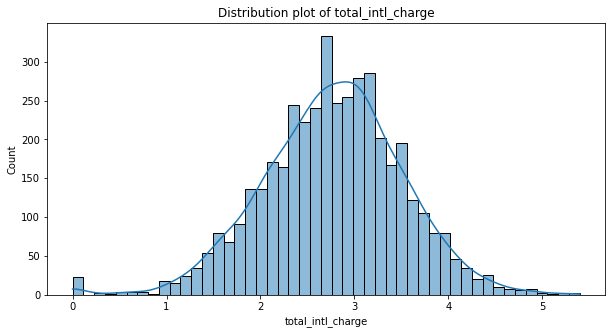

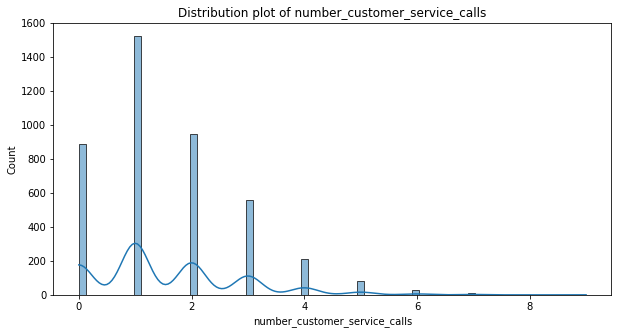

In [11]:
num_cols = data.select_dtypes(include='number')

for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x=col, kde=True)
    plt.title('Distribution plot of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Lets check if the data have outliers or not. we can use boxplot or z-score to check the occurence of outlier

* But, I am going to find the maximum and minimum values in each feature and compare it with the account lenth.

In [13]:
#outlier detection
for i in num_cols:
    print(i)
    maxi_ind=np.argmax(data[i])
    mini_ind=np.argmin(data[i])
    print("Maximum value")
    print('account_length :',data['account_length'][maxi_ind],'max_{0}_value :'.format(i),data[i][maxi_ind])
    print("Minimum value")
    print('account_length :',data['account_length'][mini_ind],'max_{0}_value :'.format(i),data[i][mini_ind])
    print('------------------------------------------------------------------------------------------------')
    print(" ")

account_length
Maximum value
account_length : 243 max_account_length_value : 243
Minimum value
account_length : 1 max_account_length_value : 1
------------------------------------------------------------------------------------------------
 
number_vmail_messages
Maximum value
account_length : 118 max_number_vmail_messages_value : 52
Minimum value
account_length : 137 max_number_vmail_messages_value : 0
------------------------------------------------------------------------------------------------
 
total_day_minutes
Maximum value
account_length : 112 max_total_day_minutes_value : 351.5
Minimum value
account_length : 98 max_total_day_minutes_value : 0.0
------------------------------------------------------------------------------------------------
 
total_day_calls
Maximum value
account_length : 91 max_total_day_calls_value : 165
Minimum value
account_length : 98 max_total_day_calls_value : 0
--------------------------------------------------------------------------------------------

The above results looks like we do not have any outliers

**Hypothesis testing**

In [14]:
def chi_square_test(x,y):
    import scipy
    from scipy.stats import chi2
    
    
    alpha=0.05    #value of alpha with 95% confidence interval                                                 
    new=pd.crosstab(x,y) #checking frequency
    df=(new.shape[0]-1)*(new.shape[1]-1) #calculating degrees of freedom
    observed_values=new.values #Observed values
    val=scipy.stats.chi2_contingency(observed_values) #calculating expected values
    expected_values=val[-1] #choosing only the expected values
    new_value=(observed_values-expected_values)**2/expected_values #caluculating chi squared values
    k=new_value.reshape(1,-1)
    chi_square_value=0 #Final or total chi squared value
    for i in k:
        for j in i:
            chi_square_value+=j
    critical_value=chi2.ppf(q=1-alpha,df=df) #Finding critical value
    p_value=1-chi2.cdf(x=chi_square_value,df=df) #Finding p value
    
    #if the p value is lesser than 0.05 we accept the null hypothesis or else we will reject
    if p_value<=alpha:
        print("Relationship exits")
    else:
        print("No relationship")
        
        

In [15]:
def anova_test(x,y):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    formula='{0} ~ {1}'.format(x,y)
    model=ols(formula,data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    anova_result.dropna(inplace=True,axis=0)
    for i in anova_result["PR(>F)"]:
        if i<0.05:
            print("Relationship exits")
        else:
            print("No relationship")

In [16]:
for i in num_cols.columns:
  print(i)
  v='data["{0}"]'.format(i)
  anova_test(v,'data["churn"]')
  print("-----------------------------")
  print(" ")
  


account_length
No relationship
-----------------------------
 
number_vmail_messages
Relationship exits
-----------------------------
 
total_day_minutes
Relationship exits
-----------------------------
 
total_day_calls
No relationship
-----------------------------
 
total_day_charge
Relationship exits
-----------------------------
 
total_eve_minutes
Relationship exits
-----------------------------
 
total_eve_calls
No relationship
-----------------------------
 
total_eve_charge
Relationship exits
-----------------------------
 
total_night_minutes
Relationship exits
-----------------------------
 
total_night_calls
No relationship
-----------------------------
 
total_night_charge
Relationship exits
-----------------------------
 
total_intl_minutes
Relationship exits
-----------------------------
 
total_intl_calls
Relationship exits
-----------------------------
 
total_intl_charge
Relationship exits
-----------------------------
 
number_customer_service_calls
Relationship exits

In [17]:
num_cols = data.select_dtypes(include='object')
for i in num_cols.columns[:-1]:
  print(i)
  chi_square_test(data[i],data['churn'])
  print("--------------------------")
  print(" ")

state
Relationship exits
--------------------------
 
area_code
No relationship
--------------------------
 
international_plan
Relationship exits
--------------------------
 
voice_mail_plan
Relationship exits
--------------------------
 


**Feature engineering**

In [20]:
data['total_minutes']=data['total_day_minutes']+data['total_eve_minutes']+data['total_night_minutes']
data['total_calls']=data['total_day_calls']+data['total_eve_calls']+data['total_night_calls']
data['total_charge']=data['total_day_charge']+data['total_eve_charge']+data['total_night_charge']
data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_day_calls','total_eve_calls','total_night_calls','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)

In [22]:
#Binning
bins=[0,40,80,120,160,200,240,280]
data['customer_since'] = pd.cut(data['account_length'], bins=bins, labels=[7,6,5,4,3,2,1])

In [23]:
data.drop('account_length',axis=1,inplace=True)

In [24]:
data.drop('area_code',axis=1,inplace=True)

In [25]:
data['international_plan']=data['international_plan'].replace({'yes':1,'no':0})
data['voice_mail_plan']=data['voice_mail_plan'].replace({'yes':1,'no':0})

In [26]:
data['churn']=data['churn'].replace({'yes':1,'no':0})

In [27]:
data['state']=data['state'].replace(data["state"].value_counts().to_dict())

In [28]:
data

,state,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,customer_since
0,95,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54,5
1,96,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00,4
2,95,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02,5
3,78,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36,6
4,89,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,80,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35,5
4246,139,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77,6
4247,80,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24,6
4248,77,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42,6


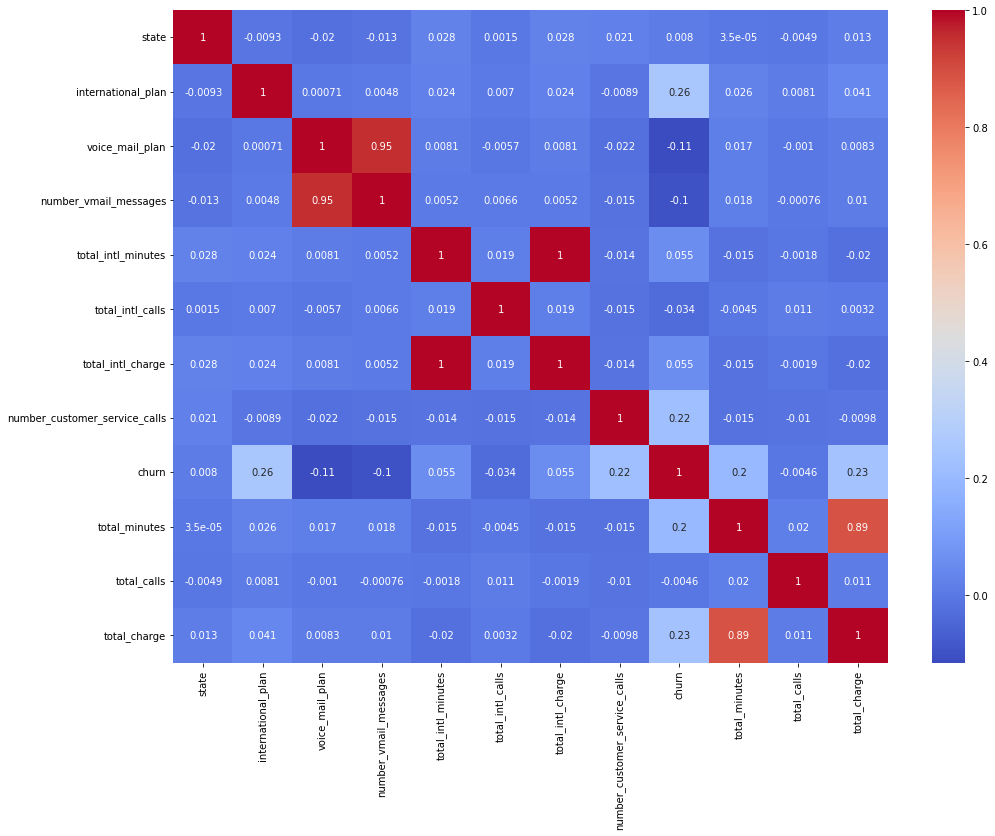

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

From the above matrix, we can see that some indipendent features are correlated with each other which means 'multicollinearity' occurs.

Let's drop some features which are correlated with each other. 

Note: Not going to drop the features have relation with target feature


In [30]:
data.drop(['number_vmail_messages','total_charge','total_intl_charge'],axis=1,inplace=True)

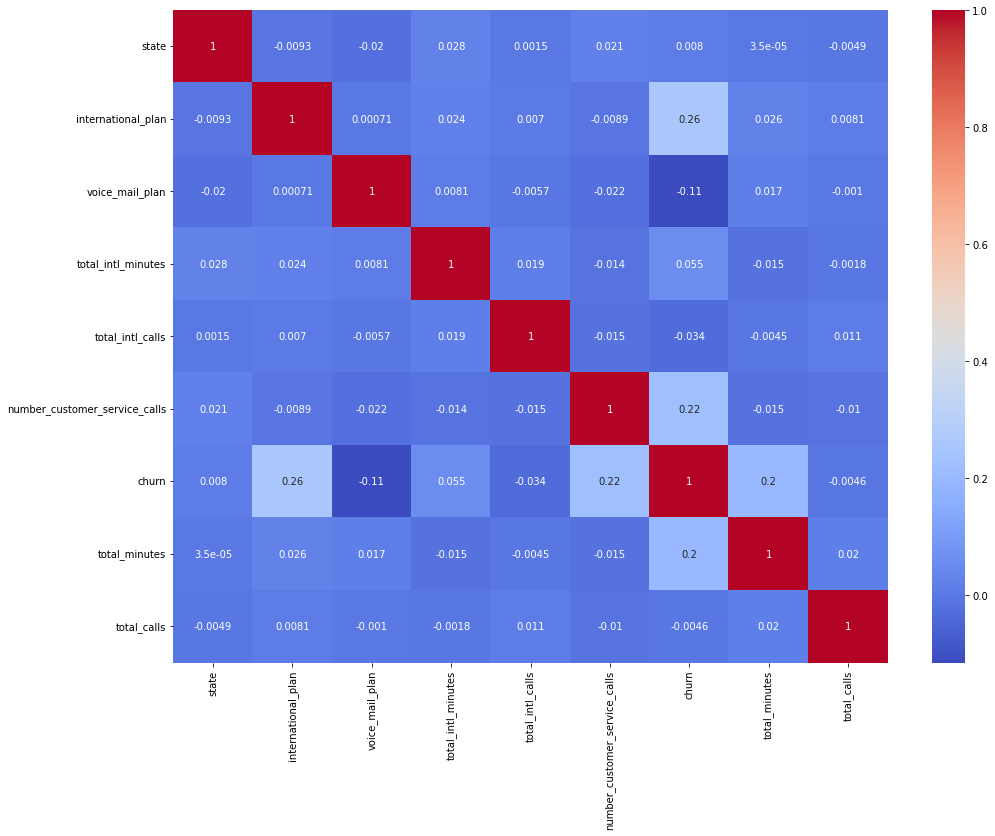

In [31]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

**Scaling**

In [43]:
from sklearn.preprocessing import MinMaxScaler

# create the scaler object
scaler = MinMaxScaler()

col=['state','total_intl_minutes','total_intl_calls','number_customer_service_calls','total_minutes','total_calls','customer_since']


# fit and transform the data
for i in col:
  data[[i]] = scaler.fit_transform(data[[i]])



Since our data is imbalanced. Let's balance this using smote(synthetic minority oversampling technique)

In [45]:
from imblearn.over_sampling import SMOTE
x=data.drop('churn',axis=1)
y=data['churn']

smote = SMOTE()

# Fit and transform the data
a,b= smote.fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


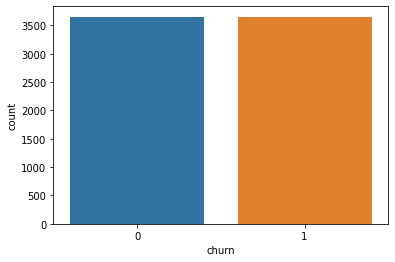

In [47]:
sns.countplot(b)

Now the data looks perfect. Let's build our model

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2)   

**Model building**

In [ ]:
pip install catboost

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [51]:
#Creating a function to calculate evaluation metrices
def best_model(x):
  model=x
  model.fit(x_train,y_train)
  y_p=model.predict(x_train)
  print("Training accuracy :",accuracy_score(y_train,y_p))
  y_pred=model.predict(x_test)
  print("Testing accuracy :",accuracy_score(y_test,y_pred))
  print("precision score :",precision_score(y_test,y_pred))
  print("Recall score :",recall_score(y_test,y_pred))
  print("roc_auc_score :",roc_auc_score(y_test,y_pred))

In [63]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),CatBoostClassifier(),GaussianNB(),SVC()]
for i in models:
  m="Model : {0}".format(i)
  print(m)
  best_model(i)
  print("----------------------------------------------")
  print(" ")

Model : LogisticRegression()
Training accuracy : 0.7680985794968338
Testing accuracy : 0.7775496235455168
precision score : 0.7851351351351351
Recall score : 0.7777777777777778
roc_auc_score : 0.7775443510737629
----------------------------------------------
 
Model : DecisionTreeClassifier()
Training accuracy : 1.0
Testing accuracy : 0.9069130732375086
precision score : 0.9025032938076416
Recall score : 0.9170013386880856
roc_auc_score : 0.9066799410527262
----------------------------------------------
 
Model : RandomForestClassifier()
Training accuracy : 1.0
Testing accuracy : 0.9541409993155373
precision score : 0.9461942257217848
Recall score : 0.965194109772423
roc_auc_score : 0.953885570292374
----------------------------------------------
 
Model : XGBClassifier()
Training accuracy : 0.9334246106452165
Testing accuracy : 0.9274469541409993
precision score : 0.9408528198074277
Recall score : 0.9156626506024096
roc_auc_score : 0.9277192804832776
----------------------------------

Catboost classifier has performed well when compare to other models. Let's make the model more better by tuning the hyperparameter.

In [65]:
from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform a grid search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

0:	learn: 0.5981504	total: 10.5ms	remaining: 3.14s
1:	learn: 0.5340029	total: 18.5ms	remaining: 2.76s
2:	learn: 0.4848577	total: 26.4ms	remaining: 2.62s
3:	learn: 0.4431964	total: 34.1ms	remaining: 2.52s
4:	learn: 0.4117462	total: 42ms	remaining: 2.48s
5:	learn: 0.3860809	total: 49.7ms	remaining: 2.44s
6:	learn: 0.3643564	total: 57.7ms	remaining: 2.41s
7:	learn: 0.3418636	total: 65.8ms	remaining: 2.4s
8:	learn: 0.3267971	total: 74.3ms	remaining: 2.4s
9:	learn: 0.3174531	total: 82.8ms	remaining: 2.4s
10:	learn: 0.3073053	total: 90.7ms	remaining: 2.38s
11:	learn: 0.2987591	total: 98.7ms	remaining: 2.37s
12:	learn: 0.2902579	total: 107ms	remaining: 2.36s
13:	learn: 0.2771263	total: 115ms	remaining: 2.35s
14:	learn: 0.2662585	total: 123ms	remaining: 2.34s
15:	learn: 0.2618093	total: 131ms	remaining: 2.33s
16:	learn: 0.2561464	total: 139ms	remaining: 2.31s
17:	learn: 0.2498484	total: 147ms	remaining: 2.3s
18:	learn: 0.2455825	total: 155ms	remaining: 2.29s
19:	learn: 0.2407708	total: 163ms	r

In [67]:
model = CatBoostClassifier(depth= 8, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1)
model.fit(x_train,y_train)
y_p=model.predict(x_train)
print("Training accuracy :",accuracy_score(y_train,y_p))
y_pred=model.predict(x_test)
print("Testing accuracy :",accuracy_score(y_test,y_pred))
print("precision score :",precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print("roc_auc_score :",roc_auc_score(y_test,y_pred))

0:	learn: 0.5981504	total: 17.9ms	remaining: 5.35s
1:	learn: 0.5340029	total: 35.7ms	remaining: 5.32s
2:	learn: 0.4848577	total: 47.7ms	remaining: 4.73s
3:	learn: 0.4431964	total: 59.3ms	remaining: 4.38s
4:	learn: 0.4117462	total: 76ms	remaining: 4.49s
5:	learn: 0.3860809	total: 98.5ms	remaining: 4.83s
6:	learn: 0.3643564	total: 120ms	remaining: 5.03s
7:	learn: 0.3418636	total: 141ms	remaining: 5.16s
8:	learn: 0.3267971	total: 164ms	remaining: 5.3s
9:	learn: 0.3174531	total: 186ms	remaining: 5.41s
10:	learn: 0.3073053	total: 215ms	remaining: 5.64s
11:	learn: 0.2987591	total: 238ms	remaining: 5.7s
12:	learn: 0.2902579	total: 264ms	remaining: 5.83s
13:	learn: 0.2771263	total: 286ms	remaining: 5.84s
14:	learn: 0.2662585	total: 307ms	remaining: 5.83s
15:	learn: 0.2618093	total: 327ms	remaining: 5.8s
16:	learn: 0.2561464	total: 349ms	remaining: 5.81s
17:	learn: 0.2498484	total: 369ms	remaining: 5.77s
18:	learn: 0.2455825	total: 388ms	remaining: 5.73s
19:	learn: 0.2407708	total: 410ms	remain

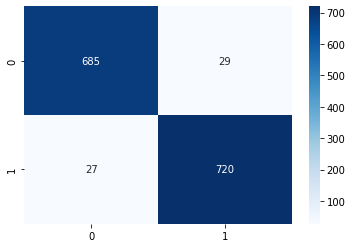

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='.3g')

Finally, we have achived an roc score of 96%